<a href="https://colab.research.google.com/github/luis8choa/Computer_Vision/blob/main/Autoencoders_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.datasets import mnist
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

In [2]:
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


Cargar dataset

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Normalizar

In [4]:
x_train2 = x_train / 255
x_test2 = x_test / 255

x_train2 = x_train2.reshape([x_train.shape[0],x_train.shape[1]*x_train.shape[2]])
x_test2 = x_test2.reshape([x_test2.shape[0],x_test2.shape[1]*x_test2.shape[2]])

print(x_train2.shape)
print(x_test2.shape)

(60000, 784)
(10000, 784)


Arquitectura del modelo

In [5]:
encoding_dim = 32

input_img = Input(shape=(x_train2.shape[1]), name = 'Entrada')
encoded =  Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(x_train2.shape[1], activation='sigmoid', name='Salida')(encoded)

autoencoder = Model(input_img, decoded)

In [6]:
encoder = Model(input_img, encoded)

In [7]:
encoded_input = Input(shape=(encoding_dim))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 Salida (Dense)              (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


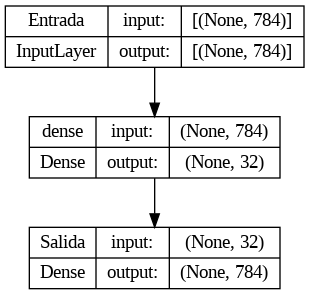

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='Autoencoder.png', show_shapes=True)

Entrenamiento

In [9]:
autoencoder.fit(x_train2,x_train2, epochs=200, batch_size=256, validation_data=(x_test2,x_test2), shuffle=True)

Epoch 1/200
235/235 [==============================] - 7s 6ms/step - loss: 0.2761 - val_loss: 0.1888
Epoch 2/200
235/235 [==============================] - 2s 7ms/step - loss: 0.1706 - val_loss: 0.1538
Epoch 3/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1444 - val_loss: 0.1338
Epoch 4/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1286 - val_loss: 0.1213
Epoch 5/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1182 - val_loss: 0.1130
Epoch 6/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1112 - val_loss: 0.1073
Epoch 7/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1064 - val_loss: 0.1031
Epoch 8/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1029 - val_loss: 0.1002
Epoch 9/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1001 - val_loss: 0.0979
Epoch 10/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0979 - val_lo

In [10]:
encoded_imgs = encoder.predict(x_test2)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


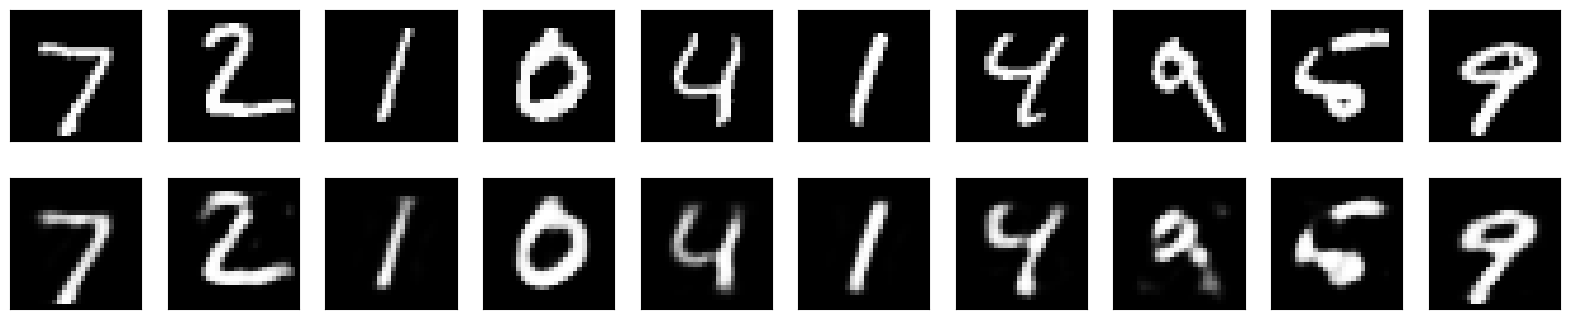

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Probar una sola imagen

In [12]:
print(x_test2[0].reshape([1,784]).shape)
print(x_test2.shape)

(1, 784)
(10000, 784)


In [13]:
result_encoding = encoder.predict(x_test2[0].reshape([1,784]))
result_decoding = decoder.predict(result_encoding)

1/1 [==============================] - 0s 24ms/step


In [14]:
print(result_decoding.shape)

(1, 784)


Mostrar imagen

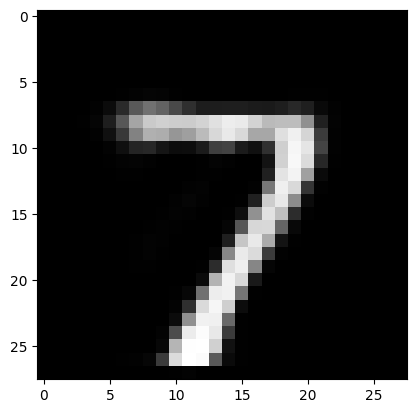

In [15]:
im = result_decoding.reshape([28,28])
plt.imshow(im,'gray')

[[ 4.9085855   3.372775    5.53302     6.004316    6.610943    1.6932089
   7.5858974   6.4968796  11.304157    4.3045173   5.612891    3.0381465
   1.9975872   4.814537    5.9114704   1.5659046   2.2756476   4.163812
   4.260593    6.7763433   2.3816404   7.253705    5.2236032   1.8092039
   7.805133    4.313262    4.5892563  10.582935    0.73412824  0.41896927
   4.2597103   8.044502  ]]


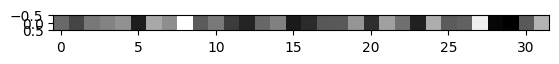

In [16]:
print(result_encoding)
plt.imshow(result_encoding)

Autoencoder profundo

In [17]:
input_img = Input(shape=(784))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32,activation= 'relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 784)               1011

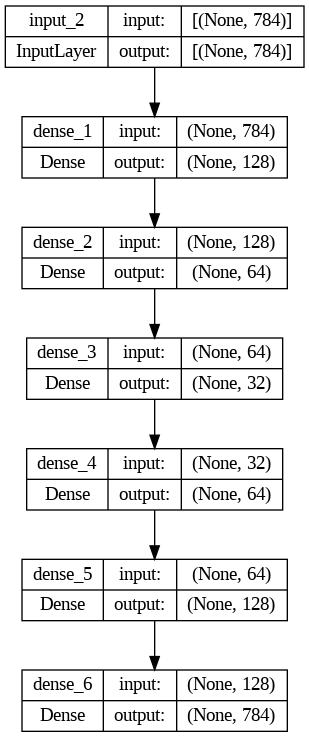

In [18]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()
plot_model(autoencoder, to_file='deep_autoencoder.jpg', show_shapes=True)

In [19]:
history = autoencoder.fit(x_train2,x_train2, epochs=200, validation_data=(x_test2,x_test2), batch_size=256, shuffle=True)

Epoch 1/200
235/235 [==============================] - 4s 6ms/step - loss: 0.2416 - val_loss: 0.1646
Epoch 2/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1494 - val_loss: 0.1365
Epoch 3/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1321 - val_loss: 0.1249
Epoch 4/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1223 - val_loss: 0.1171
Epoch 5/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1162 - val_loss: 0.1135
Epoch 6/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1120 - val_loss: 0.1086
Epoch 7/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1084 - val_loss: 0.1054
Epoch 8/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1059 - val_loss: 0.1036
Epoch 9/200
235/235 [==============================] - 2s 7ms/step - loss: 0.1038 - val_loss: 0.1015
Epoch 10/200
235/235 [==============================] - 1s 5ms/step - loss: 0.1021 - val_lo

Predicción

In [20]:
result = autoencoder.predict(x_test2)

313/313 [==============================] - 1s 2ms/step


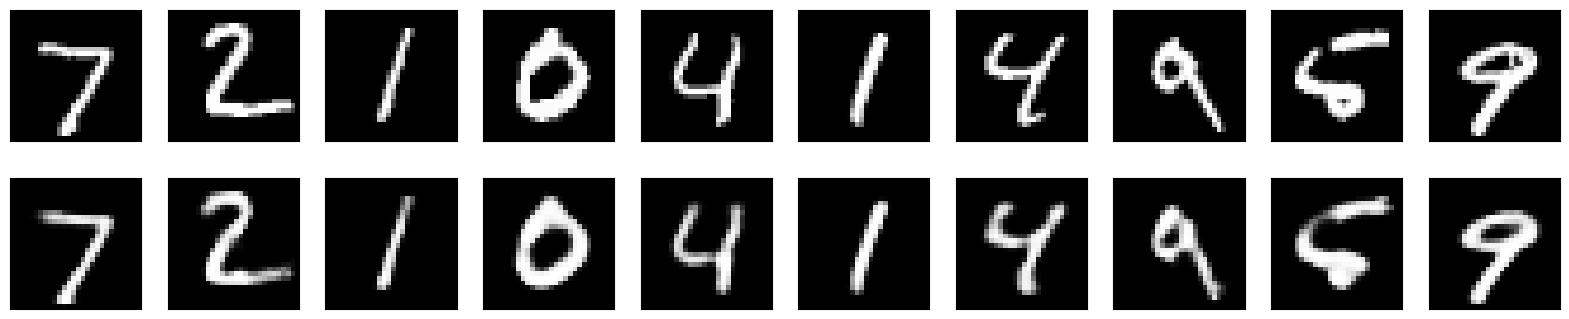

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()